---
title: Intro to Clustering
duration: "1:25"
creator:

    name: Patrick Smith
    city: DC 
---
---
edited:

    name: Ferris Jumah
    city: SF 
---

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to Clustering


Week **6**| Lesson **1.2**

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Format and preprocess data for cluster
- Perform a K-Means Clustering Analysis
- Evaluate clusters for fit 


### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Write functions in Python
- Have a working knowledge of Pandas and Scikit-Learn

### INSTRUCTOR PREP
*Before this lesson, instructors will need to:*
- Prepare the starter and solution code on their local machine



---
| TIMING  | TYPE  
|:-:|---|---|
| 25 min| [Review](#review) |
| 10 min| [**Industry Example **](#hook) |
| 45 min| [**Content **](#content) |
| 20 min| [Conclusion](#conclusion) |
| 5 min | [Additional Resources](#more)

---


<a name="opening"></a>
## Opening (5 mins)
> Instructor Note: 
- Review pre-work, projects, or exit ticket, if applicable
- Review current lesson objectives
- Reference general course content or topics (e.g. code or concepts that have been used across multiple lessons)
- Include Hook / Real-world Relevance (why the content from this lesson is useful or important)

<a name="introduction"></a>
## Introduction: Intro to Clustering (5 mins)


#### What is Clustering? 

Clustering is one of the most ubiquitous and widespread methods for understanding a dataset. In clustering, we group points in a dataset together so that the members of that group are more similar to each other than they are to members of other groups. In this sense, we're creating groups to understand our data. 

For instance; Your employer gives you a dataset of voter preferences from a local poll and they want you to figure out just exactly how these voters are grouping based on their preferences. The answer: clustering!

#### How is Clustering Different from Classification? 

You may be thinking: How is clustering different from classification? If we're just creating groups, aren't the two one and the same?
There exists an important distinction between classification and clustering: In classification, we are grouping data according to a set of predefined groups; We know what the characteristics of a mammal are, and humans have the characteristics of that predefined group. In clustering, however, we set out to figure out *if* the points in our dataset have relationships with each other, and we group those with similar characteristics in a cluster. In other words, we need to discover the classes themselves.

##### Further intuition 
[Why is Clustering Not Classification](https://www.quora.com/Why-is-clustering-not-classification)

**Check (10 minutes):** How is clustering different from classification? When might we use one over the other? Can you provide some examples?

<a name="demo"></a>
## How Does Clustering Work? - Demo (10 mins)

The are numerous algorithms for clustering a dataset; today we're going to look at one of the most commonly used algorithms: k-means.

#### K-Means Clustering

K-Means is a clustering algorithm that assumes *k* clusters, and then computes these clusters based on the attributes of the available data. The algorithm takes your entire dataset, let's call it *df*, and iterates over its attributes to determine clusters based around centers, known as **centroids**. Unlike many statistical methods, there is no finite way to determine what "k" is; for our methods, we're going to approximate *k* based on distribution of our data. 

####  K-Means Algorithm
1. Choose number of clusters, K
2. Randomly K choose centroids, data points to serve as centers
3. Calculate distance between every point and centroids
4. Assign points to closest centroids
5. Calculate "average points" of clusters
6. Use average points and repeat steps 3-5
7. Repeat until convergence or "stop point"

**Important Note** K means does not guarrentee the same results with each run

**Check:** Can you remember what Mathematical distance is? What algorithm does this remind you of?

**Unsupervised and supervised algorithms bare many similarities**

[Great visualization](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_understanding/py_kmeans_understanding.html)


#### K-Means in Python

Implementing k-means in python is as simple as calling a function from the Scikit-Learn toolbox:

```python
sklearn.cluster.KMeans(n_clusters=k)
```

Getting to this point takes a good deal of preprocessing - however we'll touch on that in a bit. To find *k* in python, we can use an approximation using a graph of the dataset.

We can also test the accuracy of our k-means test by computing the **Silhouette Coefficient**, a metric to test how well each of the data points lies within the cluster

```python
metrics.silhouette_score(test, labels, metric='euclidean')
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
sns.despine()
```
###### Silhouette Value

The silhouette value for each point is a measure of how similar that point is to points in its own cluster compared to points in other clusters, and ranges from -1 to +1.

The silhouette value for the ith point, Si, is defined as

* Si = (bi-ai)/ max(ai,bi) where ai is the average distance from the ith point to the other points in the same cluster as i, and bi is the minimum average distance from the ith point to points in a different cluster, minimized over clusters.

This is then averaged across all points.

This method just compares the intra-group similarity to closest group similarity. If any data member average distance to other members of the same cluster is higher than average distance to some other cluster members, then this value is negative and clustering is not successful. On the other hand, silhouette values close to 1 indicates a successful clustering operation. 0.5 is not an exact measure for clustering.

<a name="guided-practice"></a>
## Guided Practice: Preparing your analysis & Handling Data (15 mins)

Let's say that you're asked to perform a k-means clustering analysis on the classic Iris dataset - how would you go about it?

First; Let's setup out imports: 

In [6]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

We're going to be using **Scikit-Learn** for our analysis; let's load in the [Iris](./assets/datasets/iris.csv) dataset using Pandas

In [7]:
iris = pd.read_csv("./assets/datasets/iris.csv")
iris.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


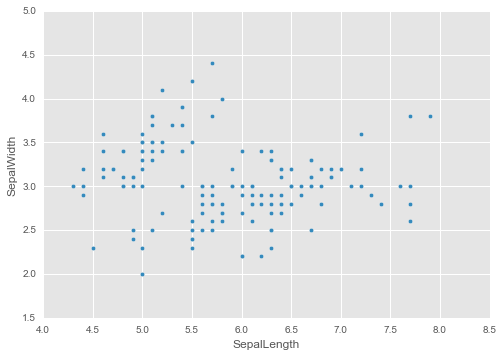

In [11]:
##Can we notice any clusters through EDA to help us decide on the K?
iris.plot(kind="scatter", x="SepalLength", y="SepalWidth")

With the Iris dataset, we already have labels, lets use those to see of our guess on number of clusters was correct

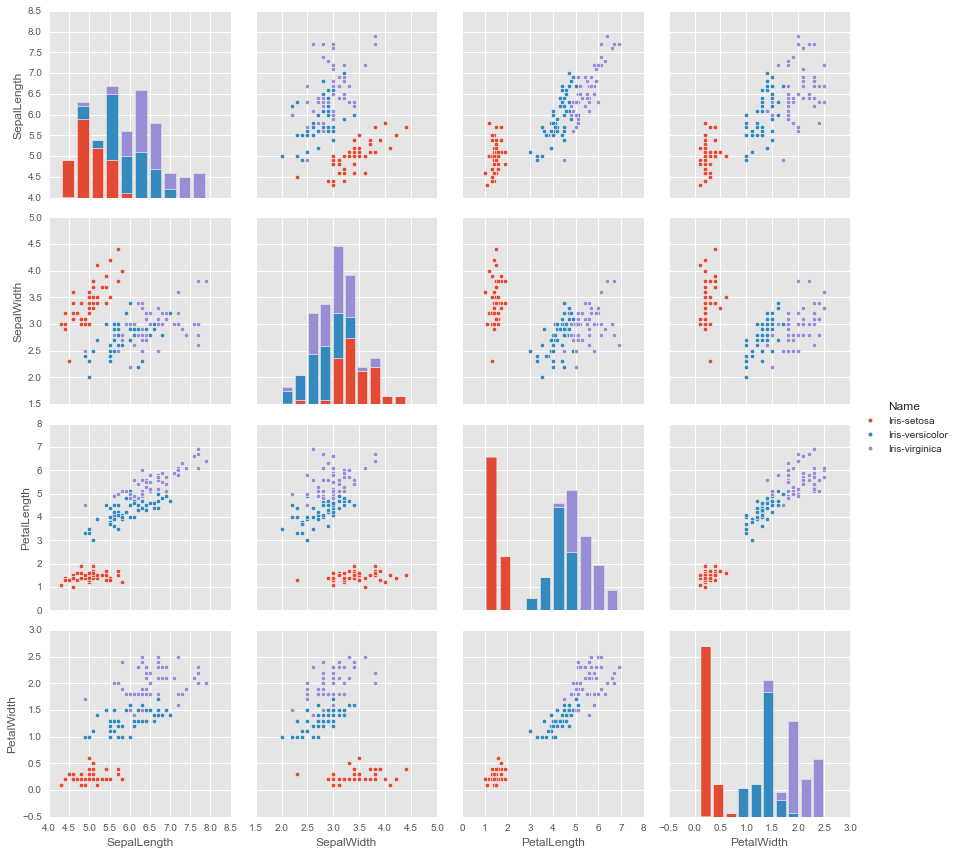

In [13]:
sns.pairplot(iris, hue="Name", size=3)

We can see that regardless of what factors we plot, there seems to be two distinct clusters emerging - this will help us with the next portion of our analysis: running the k-means test. 

Before we get there, there is a but more pre-processing to do. 

In [14]:
#Now that we have our data; let's convert it to a Pandas dataframe for our analysis: 

df = pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])

Our dataset has the categorical column **Name** in it, so we'll to convert this columns to numeric data for the k-means algorithm to accept it. Typically, that would take a simple **if** statement to for all of the values in the categorical column. For this dataset, the name column has *Iris-setosa*, *Iris-virginica*, and *Iris-versicolor* as attributes. 

Let's write a definition: 

In [15]:
def name_to_numeric(x):
    if x=='Iris-setosa':
        return 1
    if x=='Iris-virginica':
        return 2
    if x=='Iris-versicolor':
        return 3

In [24]:
df['name_num'] = df['Name'].apply(name_to_numeric)
del df['Name']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<a name="guided-practice"></a>
## Guided Practice: Perform K-Means Clustering (15 mins)

Before you perform your k-means test - there are still some transformations to do: 

We convert our data into a Numpy Array:

In [25]:
dn = df.as_matrix(columns=None)

And we're ready to go!

Now that we've formatted our data and understand it's structures, we can finally go ahead and cluster.

We're going to set *k* at two given behavior we were seeing above in our graphs. 

In [26]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn)

#We can use Scikit's built-in functions to 
#determine the locations of the centroids and their labels: 

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[ 6.262,  2.872,  4.906,  1.676,  2.5  ],
       [ 5.006,  3.418,  1.464,  0.244,  1.   ]])

In [27]:
#And to compute the clusters' silhouette coefficient:

metrics.silhouette_score(dn, labels, metric='euclidean')

0.69565093211997631

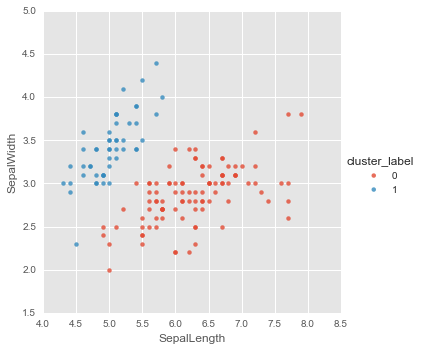

In [32]:
import seaborn as sb
df['cluster_label'] = labels
sb.lmplot(
    x = 'SepalLength',
    y = 'SepalWidth',
    hue = 'cluster_label',
    data = df,
    fit_reg=False
)

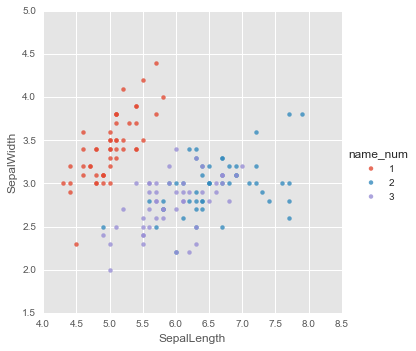

In [33]:
#Compare to actual clusters
sb.lmplot(
    x = 'SepalLength',
    y = 'SepalWidth',
    hue = 'name_num',
    data = df,
    fit_reg=False
)


...and we're done! You've completed your first clustering analysis.

**Check:** Were students able to successfully run their own code? Does it match the instructors results?


<a name="ind-practice"></a>
## Independent Practice: Perform a K-Means Analysis (15 minutes)

> Instructor Note: This can be a pair programming activity or done indpendently.

Now that we've walked through the process of clustering, it's time to try it on your own. We're going to be working with the mtcars data set, and your job is to cluster these cars to understand their various attributes.

The dataset contains a listing of 33 different cars from a used car dealership - your task is the cluster the cars to discover their groupings. For each car, you have a variety of technical information related to the car's performance. 

Open the [data](./assets/datasets/mtcars.csv) and [starter code](./code/starter-code/starter-code.ipynb) and try to work through both exercises with a partner. Do your best!

**Check:** Were you able to complete the starter code? Discuss the two variables you chose and explain how your plots demonstrate the data.

<a name="conclusion"></a>
## Conclusion (5 mins)
-  Check: What is Clustering?
- Check: How is Clustering Different from Classification?


***

### ADDITIONAL RESOURCES

- An [Introductory Tutorial on Clustering](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/)
- A [Deep Dive from Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- A Blog From [Galvanize on Clustering](http://www.galvanize.com/blog/introduction-k-means-cluster-analysis/#.VzzxhGPqNFI)
